In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('homeprices_banglore.txt')

In [3]:
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [4]:
df.shape

(20, 3)

In [5]:
#scaling
from sklearn.preprocessing import MinMaxScaler
sx=MinMaxScaler()
sy=MinMaxScaler()
scaled_x=sx.fit_transform(df.drop('price',axis=1))


In [6]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y=sy.fit_transform(df['price'].values.reshape(len(df),1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
scaled_y.shape

(20, 1)

In [9]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    no_of_features=X.shape[1]
    
    #initialising w and b values
    w=np.ones(shape=(no_of_features,1))
    b=0
    
    costs=[]
    epochs_list=[]
    total_samples=X.shape[0]#m
    for i in range(epochs):
        
        #predicting the values
        #a
        y_predicted=(np.dot(w.T,X.T)+b).T
        
        #dz=y_predicted-y_true
        #column vector
        #x--(m,#features)
        #w--(#features,1)
        #y,dz--(m,1)
        dw=(1/total_samples)*np.dot(X.T,y_predicted-y_true)
        db=np.sum(y_predicted-y_true)
        
        #updating the w and b value
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        #cost function values
        cost=np.mean(np.square(y_predicted-y_true))
        
        #recording the cost values at every 10 th iteration
        if i%10==0:
            costs.append(cost)
            epochs_list.append(i)
    
    #returning the parameters and bias and last cost and list of cost values and list of epochs
    return w,b,cost,costs,epochs_list

In [12]:
w,b,cost,costs,epochs_list=batch_gradient_descent(scaled_x,scaled_y,500)

In [13]:
w,b,cost

(array([[0.79980832],
        [0.81205036]]),
 -0.3214609053987877,
 0.015730942820522557)

Text(0, 0.5, 'cost function')

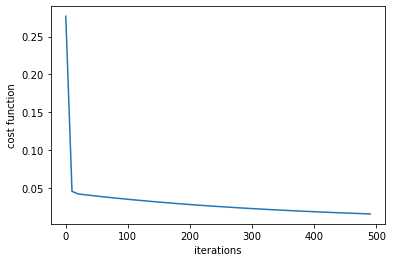

In [14]:
plt.plot(epochs_list,costs)
plt.xlabel('iterations')
plt.ylabel('cost function')

In [15]:
sx.transform([[2400,3]])

array([[0.55172414, 0.5       ]])

In [19]:
sy.transform([[4]])

array([[-0.20740741]])

In [24]:
#predicting function
def predict(area,bedrooms,w,b):
    scaled_x=sx.transform([[area,bedrooms]])
    
    scaled_price=w[0]*area+w[1]*bedrooms+b
    
    price=sy.inverse_transform([scaled_price])
    return price

In [25]:
predict(1000,2,w,b)

array([[108181.97982852]])

In [26]:
predict(1500,3,w,b)

array([[162278.6683539]])

In [27]:
import random
random.randint(0,6)

5

In [70]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    no_of_features=X.shape[1]
    
    #initialising w and b values
    w=np.ones(shape=(no_of_features,1))
    b=0
    
    costs=[]
    epochs_list=[]
    total_samples=X.shape[0]#m
    for i in range(epochs):
        random_index=random.randint(0,no_of_features-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index][0]
        
        y_predicted=(np.dot(w.T,sample_x)[0]+b)
        print(y_predicted.shape)
        dw=(1/total_samples)*((sample_x.T)*(y_predicted-sample_y))
        db=y_predicted-sample_y
        
        #updating the w,b values
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        cost=np.mean(np.square(y_predicted-sample_y))
        
        if i%100==0:
            costs.append(cost)
            epochs_list.append(i)
            
    return w,b,cost,costs,epochs_list
            
        

In [79]:
w,b,cost,costs,epochs_list=stochastic_gradient_descent(scaled_x,scaled_y,5001)

In [80]:
w,b,cost,costs,epochs_list

(array([[0.87390846, 0.87844582],
        [0.87390846, 0.87844582]]),
 -0.37573024791375886,
 0.02960776409965153,
 [0.08174195018341542,
  0.16663653047635194,
  0.08448801469419505,
  0.03415164265281203,
  0.04437144237797753,
  0.046615375885631104,
  0.043236652324036375,
  0.035257133308081376,
  0.03526801336122387,
  0.044533553466004606,
  0.05266990850429955,
  0.055606676149204566,
  0.03804426758548592,
  0.03769727751954338,
  0.033085640146172546,
  0.03729085730958813,
  0.03389644477993044,
  0.03703636474981069,
  0.033696068389739556,
  0.037186040233604875,
  0.032515588868539176,
  0.025468160907413988,
  0.03019778815347953,
  0.03322164116545607,
  0.03468305322939317,
  0.027418268720174863,
  0.027466123534194368,
  0.029820221985638638,
  0.033972607249153144,
  0.029916410423579304,
  0.029210153592685667,
  0.02217956134904008,
  0.03694988670461906,
  0.022050624493293595,
  0.03994173110093811,
  0.02054232926711651,
  0.03486637430630976,
  0.0283319655836

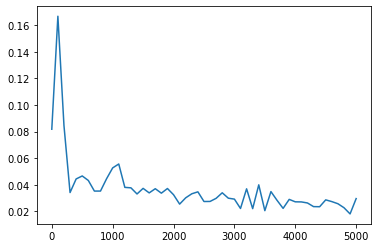

In [81]:
plt.plot(epochs_list,costs)